# Fitbit-X Cleaning (Part 1)

### IEOR $135$, Spring $2019$
#### Adele Bloch, Sarah Cook, Daniel Hwang, Kelley Liu, Wilson Tam

Our project has $2$ parts -- cleaning and EDA of data and creating a website as a platform to upload data and receive insights from the data.

Since $2$ of our team members, Adele and Sarah, have fitbits, we used their data to model the data cleaning and exploratory data analysis as if they were using our website.

## Table of Contents
#### I. Cleaning
    i. CSV Files
        a. EDA
    ii. JSON Files
    
#### II. EDA (part 2 notebook)
    i. JSON Files
        a. Activity
        b. Heartrate
        c. Calories
        d. Sleep

## Cleaning

Fitbit users are able to download and load their data in $2$ ways -- as a .csv file or .json file. As we were examining the data, we realized that the .json files had a lot more data, including not only active or sedentary minutes, but also sleep and heartrate data, which we wanted to explore further.

We split the tasks and started exploring and doing EDA on the .csv files to have an idea of what insights we could garner, while at the same time cleaning and compiling the .json files.

The downloaded .json files are separated by kind of data and dates, so there were thousands of .json files that had to be aggregated before we even started cleaning.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime
import math
import calendar
import json
import os

### CSV Files

These files had limited data, but we wanted to explore it first as most of the functions were transferable to the json files we worked with after they were aggregated and cleaned.

In [2]:
df = pd.read_csv('All Fitbit Data.csv', index_col=0, parse_dates=True)
df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
Activities,,,,,,,,,
Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
8/1/18,"2,223","14,862",6.29,25,702,271,65,8,"1,157"
8/2/18,"2,606","21,262",10.35,19,793,210,68,78,"1,537"
8/3/18,"2,951","28,019",11.86,28,310,437,123,22,"2,114"
8/4/18,"2,212","15,573",6.59,13,694,198,85,18,"1,138"


#### Renaming columns

In [3]:
#cleaning data
df.columns = df.iloc[0] #rename columns
df = df.iloc[1:] #remove row of column names
df.head()

Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Activities,,,,,,,,,
8/1/18,"2,223","14,862",6.29,25,702,271,65,8,"1,157"
8/2/18,"2,606","21,262",10.35,19,793,210,68,78,"1,537"
8/3/18,"2,951","28,019",11.86,28,310,437,123,22,"2,114"
8/4/18,"2,212","15,573",6.59,13,694,198,85,18,"1,138"
8/5/18,"2,093","13,197",5.58,25,637,206,59,13,987


#### Replacing strings as int values

In [4]:
df.loc[:,'Calories Burned'] = [col.replace(',', '') for col in df['Calories Burned']]
df.loc[:,'Steps'] = [col.replace(',', '') for col in df['Steps']]
df.loc[:,'Activity Calories'] = [col.replace(',', '') for col in df['Activity Calories']]
df.loc[:,'Minutes Sedentary'] = [col.replace(',', '') for col in df['Minutes Sedentary']]
df = df.apply(pd.to_numeric)
df.head()
#change values from strings to ints and remove commas

Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Activities,,,,,,,,,
8/1/18,2223,14862,6.29,25,702,271,65,8,1157
8/2/18,2606,21262,10.35,19,793,210,68,78,1537
8/3/18,2951,28019,11.86,28,310,437,123,22,2114
8/4/18,2212,15573,6.59,13,694,198,85,18,1138
8/5/18,2093,13197,5.58,25,637,206,59,13,987


#### Resetting Index

In [6]:
df.columns.name = ""
df = df.reset_index().rename(columns = {"Activities": "Date"})
df.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,8/1/18,2223,14862,6.29,25,702,271,65,8,1157
1,8/2/18,2606,21262,10.35,19,793,210,68,78,1537
2,8/3/18,2951,28019,11.86,28,310,437,123,22,2114
3,8/4/18,2212,15573,6.59,13,694,198,85,18,1138
4,8/5/18,2093,13197,5.58,25,637,206,59,13,987


#### Overview of data

In [5]:
#brief overview of data
df.describe()

Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,2408.490476,19070.504762,8.512905,47.516667,597.716667,244.680952,61.573810,47.209524,1362.030952
std,366.138852,6833.919678,3.343953,32.301935,120.586032,75.541849,41.453045,33.981589,421.716417
min,1729.000000,5736.000000,2.430000,0.000000,304.000000,96.000000,0.000000,0.000000,554.000000
25%,2147.000000,13966.500000,5.970000,27.000000,519.750000,188.750000,33.000000,20.750000,1033.000000
50%,2322.500000,17788.500000,7.785000,43.000000,599.000000,232.000000,51.000000,40.000000,1279.500000
75%,2652.250000,23256.000000,10.645000,61.000000,676.000000,284.500000,82.000000,66.000000,1660.000000
max,4683.000000,44446.000000,22.000000,258.000000,1049.000000,498.000000,237.000000,207.000000,2937.000000


#### Fixing dates and adding in DateTime Values

In [7]:
def fix_date_syntax(raw_date): 
    date = raw_date.split('/')  #split raw date into a list of strings
    
    date[2] = '20' + date[2]    #need to fix date syntax
    if len(date[0]) == 1:       #changes dates to mm-dd-yyyy format in order to use .weekday()
        date[0] = '0' + date[0]
    if len(date[1]) == 1:
        date[1] = '0' + date[1]
    date = '-'.join(date)
    return date
def day_num(date):
    return datetime.datetime.strptime(date, '%m-%d-%Y').weekday() # returns day of week as a number
def day_str(date):
    return datetime.datetime.strptime(date, '%m-%d-%Y').strftime('%a') #returns shortened string of day
def month(date):
    return datetime.datetime.strptime(date, '%m-%d-%Y').strftime('%b')

In [9]:
df["Date"] = df["Date"].apply(fix_date_syntax)

In [10]:
df["Day of Week (Num)"] = df["Date"].apply(day_num)
#0-Sunday, 1-Monday, etc
df['Day'] = df['Date'].apply(day_str)
df['Month'] = df['Date'].apply(month)

In [12]:
#splitting between weekday and weekend
def is_weekend(day):
    if (day == 0) or (day == 6):
        return 1
    else:
        return 0
def is_weekday(day):
    if (day == 0) or (day == 6):
        return 0
    else:
        return 1

In [13]:
df["Is_Weekend"] = df["Day of Week (Num)"].apply(is_weekend)
df["Is_Weekday"] = df["Day of Week (Num)"].apply(is_weekday)

In [14]:
#sorting records in chronological order
df = df.sort_values("Date", ascending = False)

#### Cleaned and Sorted Dataframe

In [17]:
df.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Day of Week (Num),Day,Month,Is_Weekend,Is_Weekday
152,12-31-2017,3081,18965,8.13,12,800,348,76,20,1503,6,Sun,Dec,1,0
151,12-30-2017,2397,17800,8.43,45,525,316,25,42,1384,5,Sat,Dec,0,1
150,12-29-2017,2464,17627,7.46,63,763,380,41,21,1500,4,Fri,Dec,0,1
149,12-28-2017,2094,11593,4.91,12,608,307,2,3,1017,3,Thu,Dec,0,1
148,12-27-2017,2266,13747,5.82,40,662,297,22,13,1208,2,Wed,Dec,0,1


#### Max Values

In [15]:
#max calories, distance traveled, steps in 1 day; including what date it happens on
def max_features(df):
    cb = df['Calories Burned'].max()
    step = df['Steps'].max()
    dist = df['Distance'].max()
    floors = df['Floors'].max()
    sed = df['Minutes Sedentary'].max()
    actcal = df['Activity Calories'].max()
    d = {"Values": [cb, step, dist,floors, sed, actcal]}
    return pd.DataFrame(data = d, index = ["Calories Burned","Steps", "Distance", "Floors", "Minutes Sedentary", "Activity Calories"])

In [16]:
max_features(df)

,Values
Calories Burned,4683.0
Steps,44446.0
Distance,22.0
Floors,258.0
Minutes Sedentary,1049.0
Activity Calories,2937.0


#### Pairplot of all numerical features

/Users/kelleyliu/anaconda3/envs/data-x/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


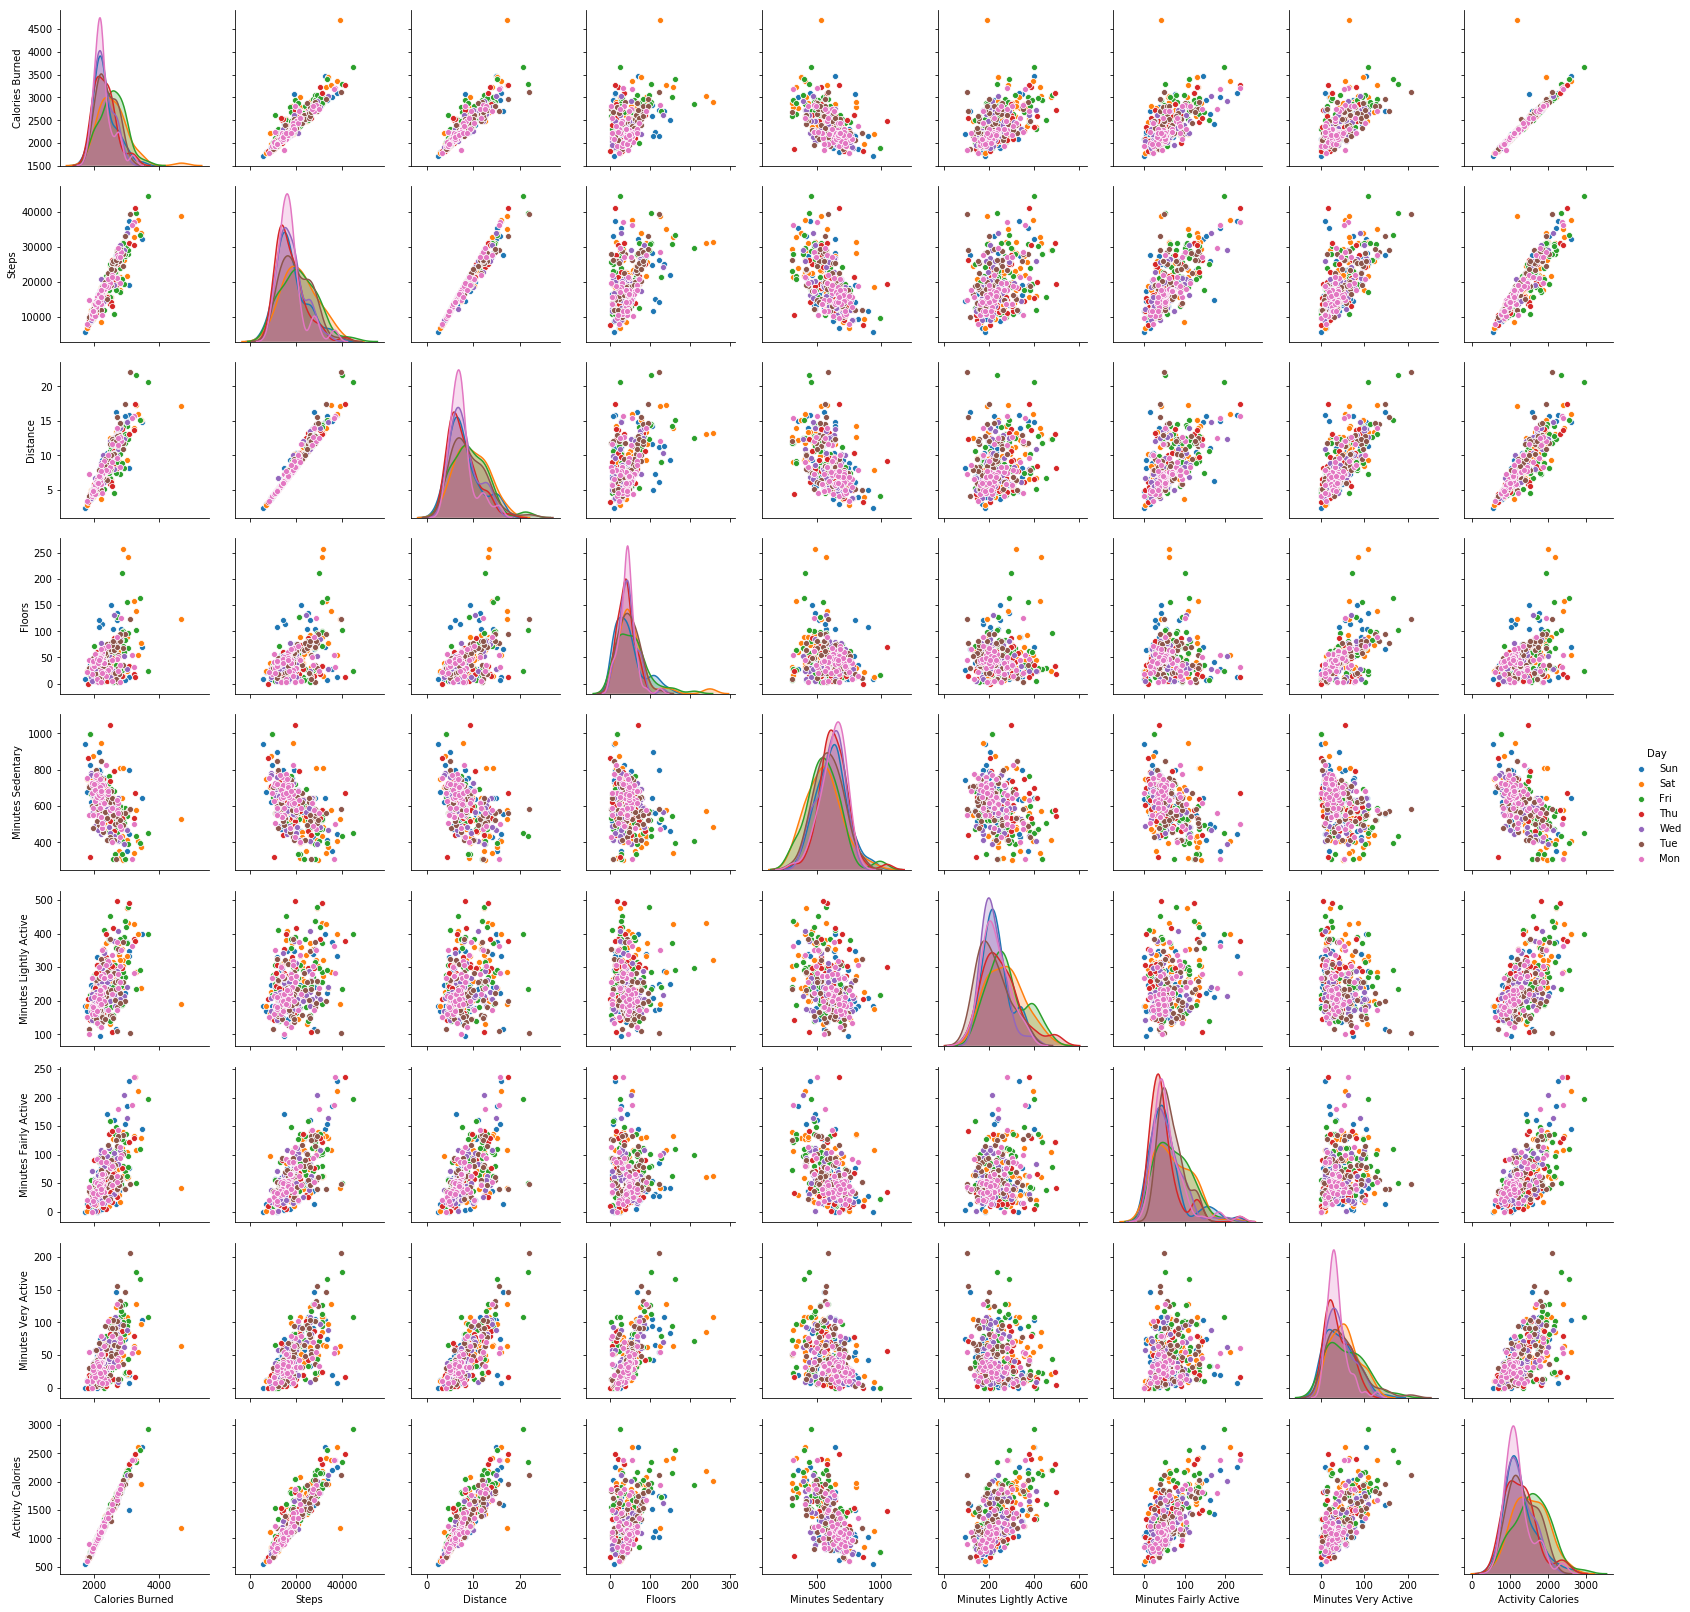

In [184]:
#excluding all categorical features besides day of the week
df_days = df.loc[:,"Date":"Day"].drop(["Day of Week (Num)"], axis = 1)
df_days
sns.pairplot(df_days, hue = "Day")

#### Plotting the day of week vs. other features

In [189]:
days = ["Sun", "Mon", "Tue", "Wed", "Thurs", "Fri", "Sat"]

#Day of week vs. calories burned
def day_calories(dataframe):
    day = dataframe["Day"]
    calories = dataframe["Calories Burned"]
    plt.figure(figsize=(8,5))
    ax = sns.violinplot(x = day, y = calories, palette = "Set2")
    ax.set_xticklabels(days, rotation='45', fontsize=14)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.set_title('Calories Burned vs. Day', fontdict={'fontsize': 20, 'fontweight': 'medium'})

#Day of week vs. minutes sedentary
def day_sedentary(dataframe):
    day = dataframe["Day"]
    sedentary = dataframe["Minutes Sedentary"]
    plt.figure(figsize=(8,5))
    ax = sns.violinplot(x = day, y = sedentary, palette = "Set2")
    ax.set_xticklabels(days, rotation='45', fontsize=14)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.set_title('Minutes Sedentary vs. Day', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#Day of week vs. minutes very active
def day_veryactive(dataframe):
    day = dataframe["Day"]
    veryactive = dataframe["Minutes Very Active"]
    plt.figure(figsize=(8,5))
    ax = sns.violinplot(x = day, y = veryactive, palette = "Set2")
    ax.set_xticklabels(days, rotation='45', fontsize=14)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.set_title('Minutes Very Active vs. Day', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#Day of week vs. floors
def day_floors(dataframe):
    day = dataframe["Day"]
    floors = dataframe["Floors"]
    plt.figure(figsize=(8,5))
    ax = sns.violinplot(x = day, y = floors, palette = "Set2")
    ax.set_xticklabels(days, rotation='45', fontsize=14)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.set_title('Floors Climbed vs. Day', fontdict={'fontsize': 20, 'fontweight': 'medium'})

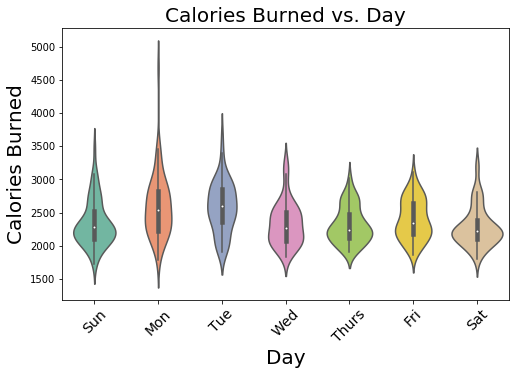

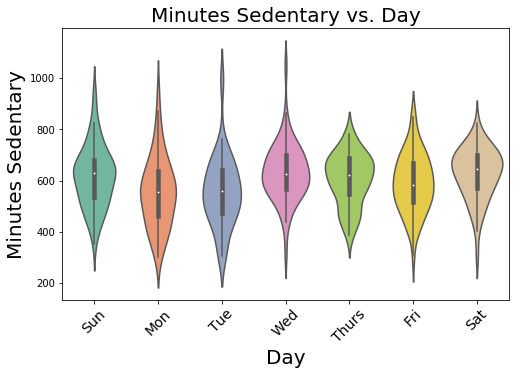

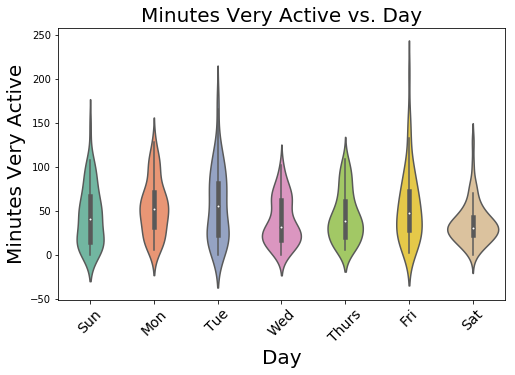

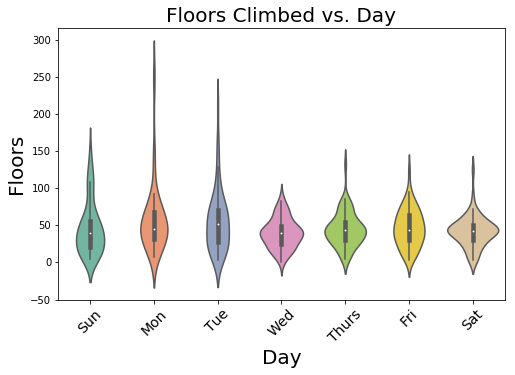

In [190]:
day_calories(df)
day_sedentary(df)
day_veryactive(df)
day_floors(df)

#### Average activity by month 

In [192]:
#average values, group by month
df_grouped_month = df.groupby("Month").agg(np.mean).iloc[:,0:9].reset_index()
df_grouped_month.head()

,Month,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,Apr,2404.700000,19141.600000,8.828667,62.066667,630.800000,229.066667,48.400000,60.700000,1353.300000
1,Aug,2470.161290,19295.709677,8.579677,45.516129,576.096774,284.322581,61.258065,42.967742,1442.935484
2,Dec,2293.774194,16841.354839,7.678387,37.806452,655.193548,235.612903,44.258065,40.354839,1208.451613
3,Feb,2306.642857,17697.035714,8.077857,58.607143,640.285714,214.250000,40.500000,57.464286,1233.821429
4,Jan,2424.064516,20981.870968,9.664839,43.096774,558.903226,210.322581,67.096774,60.838710,1379.290323


In [247]:
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
#average calories per month
def month_cal(df):
    plt.figure(figsize = (6, 4))
    plt.title("Month vs. Calories Burned")
    ax = sns.barplot(x = "Month", y = "Calories Burned", data = df)
    ax.set_xticklabels(month, rotation='45', fontsize=10)

#average distance traveled by month
def month_dist(df):
    plt.title("Month vs. Distance Traveled")
    plt.figure(figsize = (6, 4))
    ax = sns.barplot(x = "Month", y = "Distance", data = df)
    ax.set_xticklabels(month, rotation='45', fontsize=10)

#average of very active minutes by month
def month_veryactive(df):
    plt.figure(figsize = (6, 4))
    plt.title("Month vs. Minutes Very Active")
    ax = sns.barplot(x = "Month", y = "Minutes Very Active", data = df)
    ax.set_xticklabels(month, rotation='45', fontsize=10)

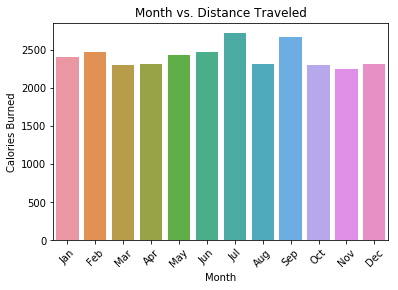

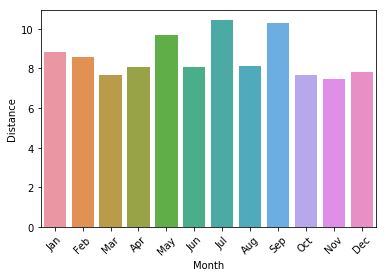

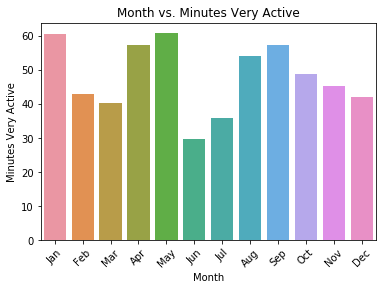

In [232]:
month_cal(df_grouped_month)
month_dist(df_grouped_month)
month_veryactive(df_grouped_month)

#### Activity on the weekend vs. weekday

In [233]:
#average values grouped by weekend or weekdays
df_grouped_wkend = df.groupby("Is_Weekend").agg(np.mean)
df_grouped_wkend

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Day of Week (Num),Is_Weekday
Is_Weekend,,,,,,,,,,,
0,2446.746667,19644.433333,8.793667,48.880000,588.000000,250.040000,62.930000,49.873333,1406.056667,3.01,1.0
1,2312.850000,17635.683333,7.811000,44.108333,622.008333,231.283333,58.183333,40.550000,1251.966667,3.00,0.0


In [248]:
wkend = ["Weekend", "Weekday"]
#average calories burned on the weekend vs weekday
def wkend_cal(df):
    plt.figure(figsize = (6, 4))
    plt.title("Calories Burned on the Weekend vs. Weekday")
    ax = sns.barplot(x = "Is_Weekday", y = "Calories Burned", data = df)
    ax.set_xticklabels(wkend, rotation='45', fontsize=10)
    plt.show()
    #average distance traveled on weekend vs weekday
def wkend_dist(df):
    plt.figure(figsize = (6, 4))
    plt.title("Distance Traveled on the Weekend vs. Weekday")
    ax = sns.barplot(x = "Is_Weekday", y = "Distance", data = df)
    ax.set_xticklabels(wkend, rotation='45', fontsize=10)
    plt.show()
    #average distance traveled on weekend vs weekday
def wkend_minveryactive(df):
    plt.figure(figsize = (6, 4))
    plt.title("Minutes Very Active on the Weekend vs. Weekday")
    ax = sns.barplot(x = "Is_Weekday", y = "Minutes Very Active", data = df)
    ax.set_xticklabels(wkend, rotation='45', fontsize=10)
    plt.show()

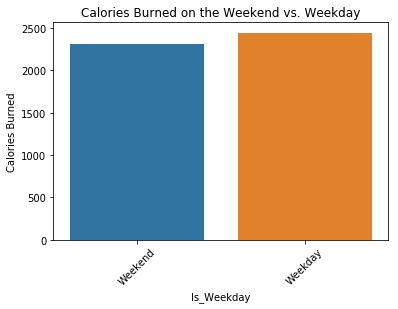

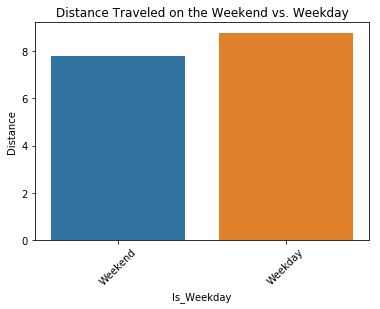

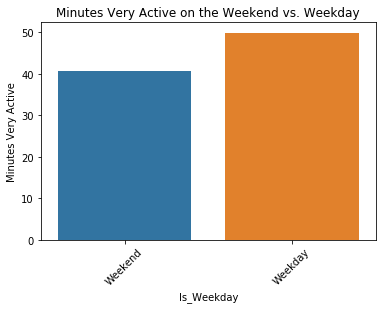

In [249]:
wkend_cal(df_grouped_wkend)
wkend_dist(df_grouped_wkend)
wkend_minveryactive(df_grouped_wkend)

### JSON Files

The process of cleaning the json files was time consuming because each kind of data was separated into a separate json file, which was then separated by date. This meant we had to aggregate across thousands of files, putting together files that had the same data, in order to then convert to dataframes. 

The runtime for this portion of the cleaning was slow, but once we had all of the data we needed in 1 file, we saved them as pickle files so that we could work with the dataframes without needing to aggregate each time we restarted the kernel. 

We decided to use the EDA of these files for the website because they provided more insight than the data from the csv files.

#### All of the json files we were working with

In [3]:
path_to_json = 'Adele_files/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')\
              and not pos_json.startswith('badge')]
json_files

['time_in_heart_rate_zones-2018-06-06.json',
 'time_in_heart_rate_zones-2017-10-05.json',
 'time_in_heart_rate_zones-2018-08-18.json',
 'heart_rate-2017-06-19.json',
 'heart_rate-2018-12-27.json',
 'time_in_heart_rate_zones-2019-02-01.json',
 'distance-2018-12-20.json',
 'heart_rate-2018-02-27.json',
 'heart_rate-2017-08-07.json',
 'demographic_vo2_max-2018-12-30.json',
 'time_in_heart_rate_zones-2017-11-28.json',
 'time_in_heart_rate_zones-2018-05-16.json',
 'time_in_heart_rate_zones-2019-01-11.json',
 'altitude-2019-02-18.json',
 'time_in_heart_rate_zones-2018-02-12.json',
 'time_in_heart_rate_zones-2018-12-12.json',
 'steps-2018-03-25.json',
 'sedentary_minutes-2018-04-24.json',
 'heart_rate-2017-10-30.json',
 'time_in_heart_rate_zones-2018-01-02.json',
 'heart_rate-2019-03-19.json',
 'heart_rate-2019-01-24.json',
 'time_in_heart_rate_zones-2018-11-02.json',
 'time_in_heart_rate_zones-2017-07-01.json',
 'moderately_active_minutes-2019-02-18.json',
 'heart_rate-2018-05-23.json',
 'di

#### Grouping files of the same data together

In [4]:
#Extracts first three objects of a string.
def first_3_letters(string):
    return string[0:3]

#Takes in a list of strings, extracts the first three objects of each string, and returns a list of unique values from
#the extracted values.
def unique_first_3(alist): 
    result = []
    for i in alist:
        result.append(first_3_letters(i))
    return list(set(result))

#Takes in a list of filenames and groups them according to the first three letters of the filename.
def group_files(list_files):
    starts = unique_first_3(list_files)
    copy_json_files = list_files
    
    grouped_files = [[] for i in range(len(starts))]
    for i in range(len(starts)):
        for j in range(len(list_files)):
            if (starts[i] == first_3_letters(copy_json_files[j])):
                grouped_files[i].append(copy_json_files[j])
    return grouped_files

In [5]:
grouped = group_files(json_files)

#### Creating dataframes from the grouped list of json files

In [6]:
#Takes in a list of lists where the files are grouped according to its content. For instance, each nested list will 
#have the name of files that have the same column names. Merges the files within each nested list. Returns the merged
#files as dataframes that are stored within a list.

def form_dataframes(grouped_list):
    dataframes = [[] for i in range(len(grouped_list))]
    final_dfs = []      
    
    #converts the filenames to dataframes
    for i in range(len(grouped_list)):
        with open(path_to_json + grouped_list[i][0], 'r') as first:
            first_filename = json.load(first)
            df1 = pd.DataFrame(first_filename)
            dataframes[i].append(df1)
        for j in range(1, len(grouped_list[i])):
            with open(path_to_json + grouped_list[i][j], 'r') as f:
                data = json.load(f)
                df = pd.DataFrame(data)
                dataframes[i].append(df)
    
    #combines all similar dataframes
    for i in range(len(dataframes)):
        final_dfs.append(pd.concat(dataframes[i], sort=True))
    
    return final_dfs

In [7]:
#list of all dataframes
all_dfs = form_dataframes(grouped)

#### Adding in dateTime features onto dataframes

In [8]:
#input is a date as a string. returns a datetime object
def separate_datetime(date):
    return datetime.datetime.strptime(date, '%m/%d/%y %H:%M:%S')

#returns day of week as integer for reference --> {0: Sunday,...., 6:Saturday}
def weekday(date):
    return datetime.datetime.strptime(date, '%m/%d/%y %H:%M:%S').weekday()

#inputs day of week as integer. 
def is_weekend(day):
    if day == 0 or day == 6:
        return True
    else:
        return False

def month(date):
    return datetime.datetime.strptime(date, '%m/%d/%y %H:%M:%S').month

def day_of_month(date):
    return datetime.datetime.strptime(date, '%m/%d/%y %H:%M:%S').day
    
def year(date):
    return datetime.datetime.strptime(date, '%m/%d/%y %H:%M:%S').year
    
def hour(date):
    return datetime.datetime.strptime(date, '%m/%d/%y %H:%M:%S').hour
    
def minute(date):
    return datetime.datetime.strptime(date, '%m/%d/%y %H:%M:%S').minute

def second(date):
    return datetime.datetime.strptime(date, '%m/%d/%y %H:%M:%S').second



#input dataframe with 'dateTime' column, adds date features to dataframe
def add_date_features(dataframe):
    
    series = dataframe['dateTime']
        
    dataframe['Day of Week'] = series.apply(weekday)
    dataframe['Is Weekend'] = dataframe['Day of Week'].apply(is_weekend)
    dataframe['Month'] = series.apply(month)
    dataframe['Day'] = series.apply(day_of_month)
    dataframe['Year'] = series.apply(year)
    dataframe['Hour'] = series.apply(hour)
    dataframe['Minute'] = series.apply(minute)
    dataframe['Second'] = series.apply(second)
    return dataframe

In [9]:
#Takes in a list of dataFrames and separates dateTime value adds these values as new columns
#dataframes w/o dataTime columns --> 1, 5, 7
def check_and_add_datetime(list_of_dataframes):
    a_list = list_of_dataframes
    
    for i in range(len(a_list)):
        if 'dateTime' in a_list[i].columns:
            a_list[i] = add_date_features(a_list[i])
    return a_list

In [10]:
#Added columns with information about dates
dfs_dates = check_and_add_datetime(all_dfs)

#### Save dataframe as files

In [11]:
#Saves all the dataframes as a file so that we don't have to rerun all previous code. Saved dataframes already have
#date features.

temp_filenames = ['df1.pk1','df2.pk1','df3.pk1','df4.pk1','df5.pk1','df6.pk1','df7.pk1','df8.pk1','df9.pk1','df10.pk1'\
                 ,'df11.pk1','df12.pk1','df13.pk1','df14.pk1','df15.pk1','df16.pk1','df17.pk1']

for i in range(len(dfs_dates)):
    dfs_dates[i].to_pickle('./Adele_files/dfs_with_date/' + temp_filenames[i])


### Reuploading dataframes from pickled files

In [12]:
# Command to reupload dataframes with date features
pre_cleaned = []
temp_filenames = ['df2.pk1','df4.pk1','df6.pk1','df8.pk1','df10.pk1','df11.pk1','df14.pk1','df15.pk1','df16.pk1', 'df17.pk1']
#reuploading only files with dataframes we need 
for i in range(len(temp_filenames)):
    pre_cleaned.append(pd.read_pickle('./Adele_files/dfs_with_date/' + temp_filenames[i]))

#### Functions to drop unnecessary columns

In [13]:
#index dataframe numerically because some dataframes have repetitive numbers 
def index(df):
    df.index = range(0, len(df))
    return df

In [14]:
#some records are at midnight, so hour, niute, second are unnecessary
def drop_time(df):
    df.drop(["Hour", "Minute", "Second"], axis=1, inplace=True)
    return df

In [15]:
for i in range(len(pre_cleaned)):
    index(pre_cleaned[i])

#### Renaming dataframe columns

In [18]:
def rename_column_df(dfs):
    dfs[0].index.name = 'sleep data'
    
    dfs[1] = dfs[1].rename(columns = {'value':'resting heart rate'})
    dfs[1].index.name = 'resting heartrate'
    
    dfs[2] = dfs[2].rename(columns={'value':'calories burned'})
    dfs[2].index.name = 'calories burned'
    
    dfs[3] = dfs[3].rename(columns = {'value':'moderately active min'})
    dfs[3].index.name = 'moderately active min'
    
    dfs[4] = dfs[4].rename(columns = {'value':'sedentary min'})
    dfs[4].index.name = 'sedentary min'
    
    dfs[5] = dfs[5].rename(columns={'value':'altitude'})
    dfs[5].index.name = 'altitude'
    
    dfs[6] = dfs[6].rename(columns = {'value':'lightly active min'})
    dfs[6].index.name = 'lightly active min'
    
    dfs[7] = dfs[7].rename(columns = {'value':'distance traveled'})
    dfs[7].index.name = 'distance'

    dfs[8] = dfs[8].rename(columns = {'value':'very active min'})
    dfs[8].index.name = 'very active min'
    
    dfs[9].index.name = 'activity summary'

In [19]:
rename_column_df(pre_cleaned)

#### Sleep DF

In [25]:
def sleep_clean(df):
    df = df.reset_index()
    deepcount = []
    deepminutes = []
    deepthirtyDayAvgMinutes = []
    wakecount = []
    wakeminutes = []
    wakethirtyDayAvgMinutes = []
    lightcount = []
    lightminutes = []
    lightthirtyDayAvgMinutes = []
    remcount = []
    remminutes = []
    remthirtyDayAvgMinutes = []
    for i in range(len(df)):
        for stage in ["deep", "wake", "light", "rem"]:
            if stage in df["levels"][i]["summary"]:
                all_values = df["levels"][i]["summary"][stage]
                for parameter in ["count", "minutes", "thirtyDayAvgMinutes"]:
                    vars()[stage+parameter].append(all_values[parameter])
            else:
                for parameter in ["count", "minutes", "thirtyDayAvgMinutes"]:
                    vars()[stage+parameter].append(0)  

    df.drop("levels",inplace=True, axis=1)
    df.drop("logId",inplace=True, axis=1)
    df.drop("sleep data", inplace=True, axis=1)

    all_columns_added = [deepcount, deepminutes, deepthirtyDayAvgMinutes, wakecount, wakeminutes, wakethirtyDayAvgMinutes, lightcount, lightminutes, lightthirtyDayAvgMinutes, remcount, remminutes, remthirtyDayAvgMinutes]
    column_names = ["deepcount", "deepminutes", "deepthirtyDayAvgMinutes", "wakecount", "wakeminutes", "wakethirtyDayAvgMinutes", "lightcount", "lightminutes", "lightthirtyDayAvgMinutes", "remcount", "remminutes", "remthirtyDayAvgMinutes"]
    for i in range(len(all_columns_added)):
        df[column_names[i]] = all_columns_added[i]
    return df

In [ ]:
pre_cleaned[0] = sleep_clean(pre_cleaned[0])

In [158]:
pre_cleaned[0].head()

,dateOfSleep,duration,efficiency,endTime,minutesAfterWakeup,minutesAsleep,minutesAwake,minutesToFallAsleep,startTime,timeInBed,...,deepthirtyDayAvgMinutes,wakecount,wakeminutes,wakethirtyDayAvgMinutes,lightcount,lightminutes,lightthirtyDayAvgMinutes,remcount,remminutes,remthirtyDayAvgMinutes
0,2017-12-25,29820000,97,2017-12-25T06:26:00.000,0,442,55,0,2017-12-24T22:08:30.000,497,...,66,22,55,65,22,281,254,7,85,93
1,2017-12-24,3900000,88,2017-12-24T18:42:30.000,0,57,8,0,2017-12-24T17:37:00.000,65,...,0,0,0,0,0,0,0,0,0,0
2,2017-12-24,24480000,95,2017-12-24T06:55:30.000,0,357,51,0,2017-12-24T00:07:00.000,408,...,66,22,51,65,22,224,256,9,91,93
3,2017-12-23,7980000,96,2017-12-23T16:28:00.000,0,128,5,0,2017-12-23T14:15:00.000,133,...,0,0,0,0,0,0,0,0,0,0
4,2017-12-22,32400000,94,2017-12-22T20:25:30.000,0,448,92,0,2017-12-22T11:25:30.000,540,...,66,23,92,64,27,299,254,6,61,94


#### Resting Heart Rate DF

In [159]:
#extract heartrate value and add column in dataframe 
def heart_dict(df):
    heartrate = []
    error = []
    for i in range(len(df)):
        heartrate.append(df.iloc[i]['resting heart rate'].get('value'))
        error.append(df.iloc[i]['resting heart rate'].get('error'))
    df['heartrate'] = pd.Series(heartrate)
    df['error'] = pd.Series(error)
    df = df.drop(columns = ['resting heart rate'])
    return df

In [160]:
#remove rows that have no heartrate records (heartrate = 0, error = 0)
def remove_zero(df):
    return  df.loc[((df.loc[:,'heartrate'] != 0.0) & (df.loc[:,'error'] != 0.0)),:]

In [161]:
pre_cleaned[1] = remove_zero(heart_dict(pre_cleaned[1]))

In [162]:
pre_cleaned[1].head()

,dateTime,Day of Week,Is Weekend,Month,Day,Year,heartrate,error
resting heartrate,,,,,,,,
151,05/30/17 00:00:00,1,False,5,30,2017,72.000000,100.000000
152,05/31/17 00:00:00,2,False,5,31,2017,66.424713,26.950447
153,06/01/17 00:00:00,3,False,6,1,2017,65.973721,10.661155
154,06/02/17 00:00:00,4,False,6,2,2017,65.922898,7.914382
155,06/03/17 00:00:00,5,False,6,3,2017,66.353669,7.146274


#### Calories Burned DF

In [21]:
def agg_cal_burned(df):
    df['calories burned'] = df['calories burned'].apply(np.double)
    df = df.groupby(['Month', 'Day', 'Year']).agg({'calories burned':np.sum, 'Day of Week': np.mean, 'Is Weekend': np.mean})
    return df

In [23]:
pre_cleaned[2] = agg_cal_burned(pre_cleaned[2])

In [24]:
pre_cleaned[2]

calories burned  Day of Week  Is Weekend
Month Day Year                                          
1     1   2017             15.0            6        True
          2018             40.0            0        True
          2019             42.0            1       False
      2   2017             13.0            0        True
          2018            125.0            1       False
          2019              0.0            2       False
      3   2017              0.0            1       False
          2018             50.0            2       False
          2019              4.0            3       False
      4   2017             28.0            2       False
          2018             90.0            3       False
          2019             16.0            4       False
      5   2017              0.0            3       False
          2018             74.0            4       False
          2019             71.0            5       False
      6   2017              0.0            4       False
          2018             63.0            5       False
          2019              0.0            6        True
      7   2017              0.0            5       False
          2018            153.0            6        True
          2019              0.0            0        True
      8   2017              0.0            6        True
          2018             34.0            0        True
          2019             11.0            1       False
      9   2017              6.0            0        True
          2018             94.0            1       False
          2019             46.0            2       False
      10  2017             24.0            1       False
          2018             72.0            2       False
          2019              0.0            3       False
...                         ...          ...         ...
12    18  2017             33.0            0        True
          2018             53.0            1       False
      19  2017             39.0            1       False
          2018              3.0            2       False
      20  2017             60.0            2       False
          2018             16.0            3       False
      21  2017             10.0            3       False
          2018              4.0            4       False
      22  2017             56.0            4       False
          2018             43.0            5       False
      23  2017            135.0            5       False
          2018             29.0            6        True
      24  2017              0.0            6        True
          2018              0.0            0        True
      25  2017              0.0            0        True
          2018             13.0            1       False
      26  2017             23.0            1       False
          2018             16.0            2       False
      27  2017             22.0            2       False
          2018             31.0            3       False
      28  2017              2.0            3       False
          2018             37.0            4       False
      29  2017             41.0            4       False
          2018             38.0            5       False
      30  2016              0.0            4       False
          2017             25.0            5       False
          2018            129.0            6        True
      31  2016              9.0            5       False
          2017             76.0            6        True
          2018             42.0            0        True

[840 rows x 3 columns]

#### Moderately Active Minutes DF

In [169]:
pre_cleaned[3].head()

,dateTime,moderately active min,Day of Week,Is Weekend,Month,Day,Year
moderately active min,,,,,,,
0,02/18/19 00:00:00,28,0,True,2,18,2019
1,02/19/19 00:00:00,53,1,False,2,19,2019
2,02/20/19 00:00:00,52,2,False,2,20,2019
3,02/21/19 00:00:00,36,3,False,2,21,2019
4,02/22/19 00:00:00,37,4,False,2,22,2019


#### Sedentary Minutes DF

In [170]:
pre_cleaned[4].head()

,dateTime,sedentary min,Day of Week,Is Weekend,Month,Day,Year
sedentary min,,,,,,,
0,04/24/18 00:00:00,603,1,False,4,24,2018
1,04/25/18 00:00:00,568,2,False,4,25,2018
2,04/26/18 00:00:00,1049,3,False,4,26,2018
3,04/27/18 00:00:00,566,4,False,4,27,2018
4,04/28/18 00:00:00,590,5,False,4,28,2018


#### Altitude DF

In [171]:
pre_cleaned[5].head()

,dateTime,altitude,Day of Week,Is Weekend,Month,Day,Year,Hour,Minute,Second
altitude,,,,,,,,,,
0,02/18/19 00:31:00,20,0,True,2,18,2019,0,31,0
1,02/18/19 00:36:00,10,0,True,2,18,2019,0,36,0
2,02/18/19 11:31:00,10,0,True,2,18,2019,11,31,0
3,02/18/19 11:38:00,10,0,True,2,18,2019,11,38,0
4,02/18/19 12:38:00,10,0,True,2,18,2019,12,38,0


#### Lightly Active Minutes DF

In [172]:
pre_cleaned[6].head()

,dateTime,lightly active min,Day of Week,Is Weekend,Month,Day,Year
lightly active min,,,,,,,
0,12/20/18 00:00:00,226,3,False,12,20,2018
1,12/21/18 00:00:00,240,4,False,12,21,2018
2,12/22/18 00:00:00,317,5,False,12,22,2018
3,12/23/18 00:00:00,277,6,True,12,23,2018
4,12/24/18 00:00:00,377,0,True,12,24,2018


#### Distance DF

In [181]:
dist = pre_cleaned[7]
# cleanpls = pre_cleaned[7]
# #dfs_dates[7] had repeating indexes for each day so we reset indexes in order
# cleanpls2 = cleanpls.reset_index(drop=True)

#create new column with datetime object (year-month-day) and drop unccessary columns
dist['date'] = [datetime.date(int(x[6:8]), int(x[0:2]), int(x[3:5])) for x in dist['dateTime']]
dist = dist.drop(columns=['dateTime', 'Minute', 'Second', 'Hour'])
#distance traveled is a string so convert to numbers
dist["distance traveled"] = pd.to_numeric(dist["distance traveled"])
#groupby date and sum distance traveled
dist = dist.groupby('date').agg({'distance traveled':'sum','Day of Week':'max',\
                             'Is Weekend':'max', 'Month':'max', 'Day':'max', 'Year':'max'})
pre_cleaned[7] = dist.reset_index()
pre_cleaned[7].head()

,date,distance traveled,Day of Week,Is Weekend,Month,Day,Year
0,0016-12-31,7137,5,False,12,31,2016
1,0017-01-01,16107,6,True,1,1,2017
2,0017-01-02,6462,0,True,1,2,2017
3,0017-01-03,10344,1,False,1,3,2017
4,0017-01-04,10779,2,False,1,4,2017


#### Very Active Minutes DF

In [174]:
pre_cleaned[8].head()

,dateTime,very active min,Day of Week,Is Weekend,Month,Day,Year
very active min,,,,,,,
0,06/28/17 00:00:00,94,2,False,6,28,2017
1,06/29/17 00:00:00,37,3,False,6,29,2017
2,06/30/17 00:00:00,15,4,False,6,30,2017
3,07/01/17 00:00:00,98,5,False,7,1,2017
4,07/02/17 00:00:00,26,6,True,7,2,2017


#### Activity Summary DF

In [176]:
#drop columns that are not important/don't give much insight 
def drop_activity(df):
    df = df.drop(columns = ['tcxLink', 'activityTypeId','duration','heartRateZones','activeDuration','vo2Max','manualValuesSpecified', 'logType', 'intervalWorkoutData','lastModified','shouldFetchDetails','source', 'hasGps'])
    return df

In [177]:
#extracting dictionary and adding sedentary, lightly active, fairly active, very active minutes into dataframe
def extract_dict(df):
    sed = []
    light = []
    fairly = []
    very = []
    for i in range(len(df)):
        for j in range(len(df.iloc[i]['activityLevel'])):
            if df.iloc[i]['activityLevel'][j].get('name') == 'sedentary':
                sed.append(df.iloc[i]['activityLevel'][j].get('minutes'))
            elif df.iloc[i]['activityLevel'][j].get('name') == 'lightly':
                light.append(df.iloc[i]['activityLevel'][j].get('minutes'))
            elif df.iloc[i]['activityLevel'][j].get('name') == 'fairly':
                fairly.append(df.iloc[i]['activityLevel'][j].get('minutes'))
            elif df.iloc[i]['activityLevel'][j].get('name') == 'very':
                very.append(df.iloc[i]['activityLevel'][j].get('minutes'))
    df['sedentary'] = pd.Series(sed)
    df['lightly'] = pd.Series(light)
    df['fairly'] = pd.Series(fairly)
    df['very'] = pd.Series(very)
    df = df.drop(columns = ['activityLevel'])
    return df

In [178]:
pre_cleaned[9] = extract_dict(drop_activity(pre_cleaned[9]))

In [179]:
pre_cleaned[9].head()

,activityName,averageHeartRate,calories,distance,distanceUnit,elevationGain,logId,originalDuration,originalStartTime,pace,speed,startTime,steps,sedentary,lightly,fairly,very
activity summary,,,,,,,,,,,,,,,,,
0,Walk,103.0,123,NaN,NaN,0.0,14821236395,1843000,06/11/18 18:15:57,NaN,NaN,06/11/18 18:15:57,2190.0,0,14,16,0
1,Walk,102.0,287,NaN,NaN,20.0,14821236396,3942000,06/11/18 19:29:20,NaN,NaN,06/11/18 19:29:20,5299.0,5,9,47,4
2,Walk,100.0,184,NaN,NaN,0.0,14836427357,3072000,06/12/18 08:42:05,NaN,NaN,06/12/18 08:42:05,3022.0,5,31,14,1
3,Walk,110.0,165,NaN,NaN,10.0,14836427362,2304000,06/12/18 11:48:07,NaN,NaN,06/12/18 11:48:07,2931.0,0,11,26,1
4,Walk,105.0,148,NaN,NaN,50.0,14836427365,2151000,06/12/18 12:58:05,NaN,NaN,06/12/18 12:58:05,2585.0,1,15,18,1


#### Saving cleaned files, ready for EDA

In [183]:
temp_filenames = ['sleep.pk1','resting.pk1','cal_burned.pk1','mod_act.pk1','sed_active.pk1','alt.pk1','light_act.pk1','dist.pk1','very_active.pk1', 'activity.pk1']

for i in range(len(pre_cleaned)):
    pre_cleaned[i].to_pickle('./Adele_files/cleaned/' + temp_filenames[i])